In [2]:
# Import all the libraries which will be used later
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline 

# Data Wrangling:

Get familiar with the data types, data structure. I did delete the duplicates and unuseful columns like imdb_id,homepage etc.

When handling the missing data. I use two ways: for all the missing data with data type object, i fill the null with string "missing". For budget, datatype integer,I fill 0 with np.NAN.

In [19]:
# load in data and print out the head
movie = pd.read_csv('imdb_movies.csv')
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [20]:
# check the rows and columns of this dataset
movie.shape

(10866, 21)

In [21]:
# check datatypes to see if there are some wrongly categorized types
movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [22]:
# check each columns number of unique values
movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [23]:
movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [24]:
# statistic values for this data 
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [51]:
# drop unuseful columns 
movie.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)  # do not forget inplace 

# Ways to handle missing data
# For all missing data with object as datatype , I fill in with string "missing"
movie['cast'].fillna('missing',inplace=True )
movie['director'].fillna('missing',inplace=True)
movie['tagline'].fillna('missing',inplace=True)
movie['keywords'].fillna('missing',inplace=True)
movie['genres'].fillna('missing',inplace=True)
movie['production_companies'].fillna('missing',inplace=True) 
movie['budget'] = movie['budget'].replace(0, np.NAN) 
# although there is no null in budget, but we would find there is a problem when we calculate df['budget'].median()
# Will deal with all the 0 value in budget later.

In [52]:
movie.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [53]:
# check if there are some duplicates 
movie.duplicated().sum()

0

In [34]:
# drop the duplicates
movie.drop_duplicates(inplace=True)     # do not forget inplace = True 
# confirm again 
movie.duplicated().sum()   

0

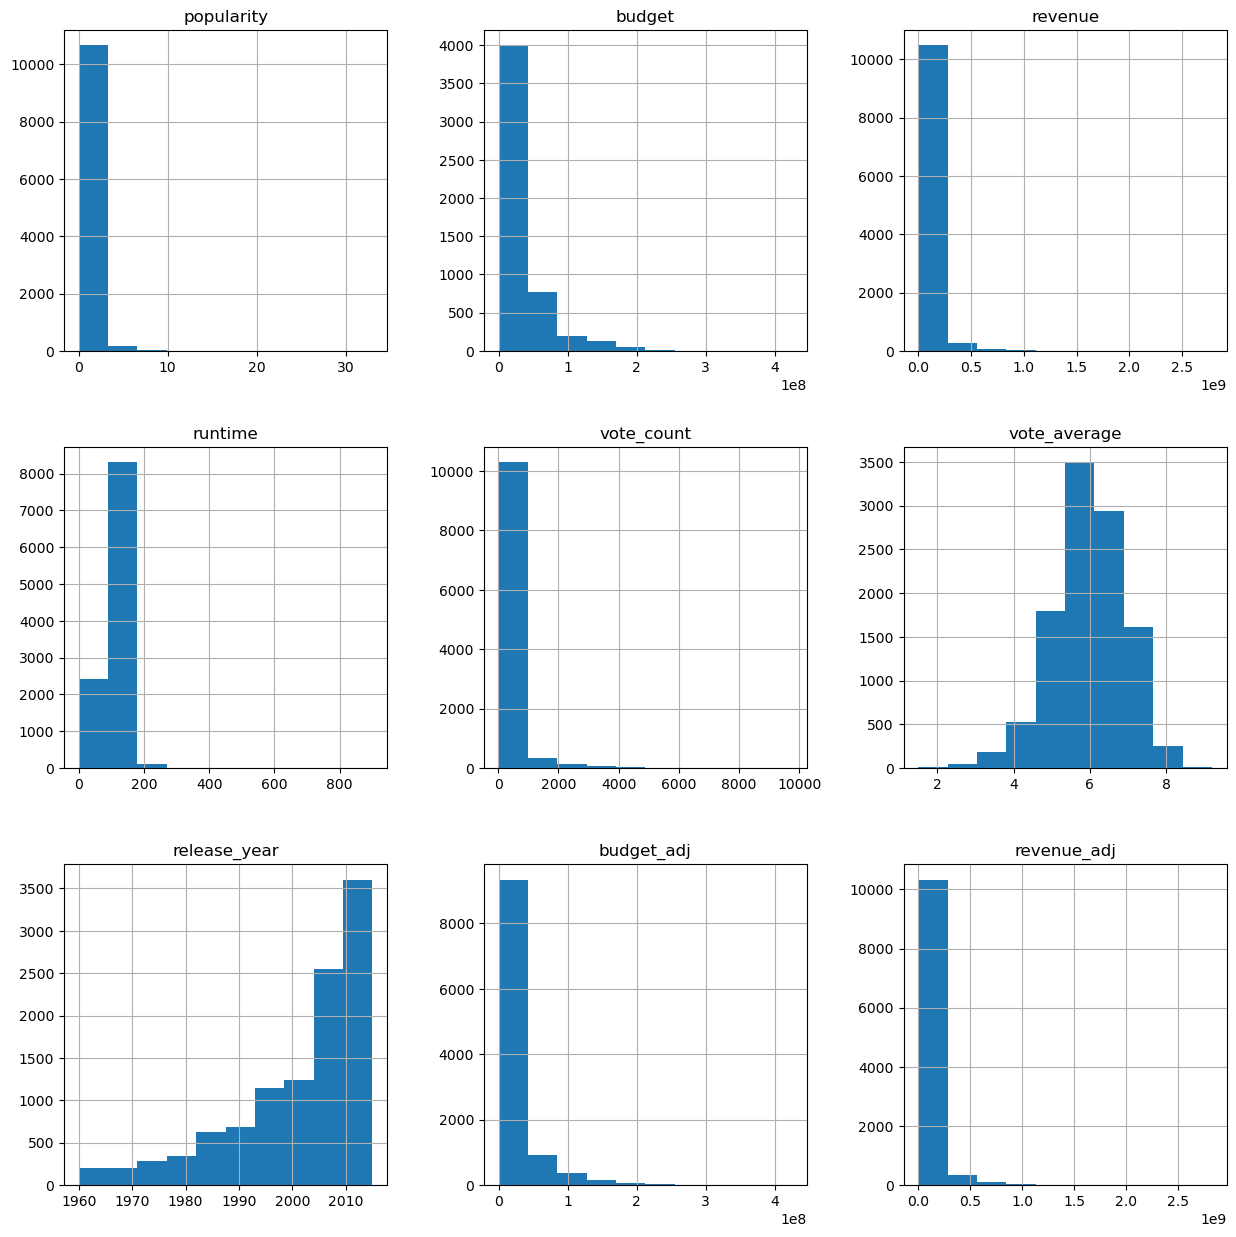

In [54]:
# visulize each variables 
movie.hist(figsize=(15,15));

# Exploration with Visuals and Conclusions

Question 1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

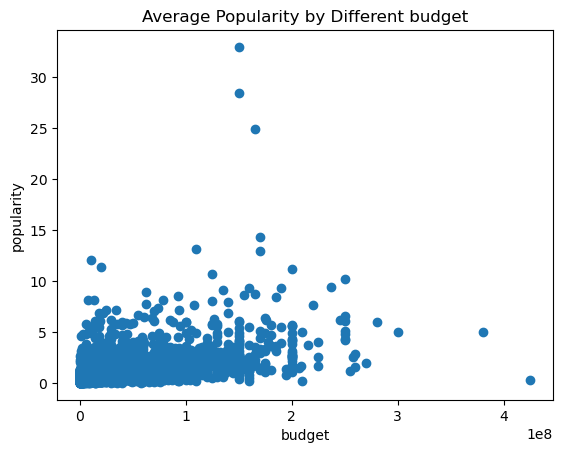

In [55]:
# plot the relation between budget and popularity 

plt.scatter(movie['budget'], movie['popularity'])
plt.title('Average Popularity by Different budget',fontsize=12)
plt.xlabel('budget',fontsize=10)
plt.ylabel('popularity',fontsize=10)
plt.show()

We can not see very strong relatioship between the budget and the popularity from above plot. Let's try to compare the data in another way: create two groups based on median value of budget

In [56]:
# based on median budget value to divide the budget into two groups : low and high
m = movie['budget'].median()
low_budget =  movie.query('budget < {}'.format(m))
high_budget =  movie.query('budget >= {}'.format(m))

In [57]:
# check low budget and high budget mean values respecively 
mean_popularity_of_low_budget = low_budget['popularity'].mean()
mean_popularity_of_high_budget = high_budget['popularity'].mean()

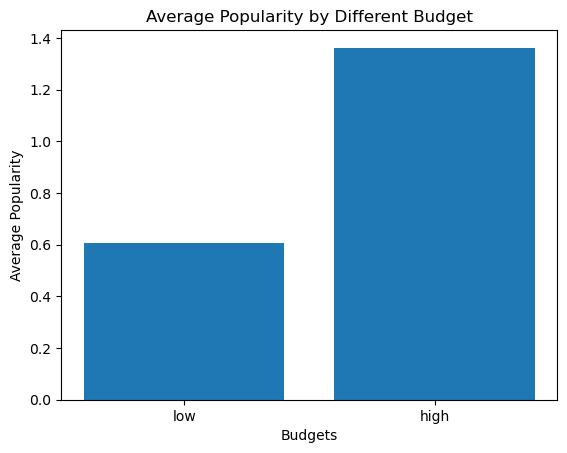

In [60]:
# create a bar chart with the values we get above 

plt.bar([1,2], [mean_popularity_of_low_budget , mean_popularity_of_high_budget], tick_label = ['low','high'])
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')
plt.show()

In [61]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

In summary, based on the information presented in the bar plot, it is evident that movies with larger budgets tend to be more popular. Specifically, we can conclude that higher budget films achieve over 50% greater popularity compared to low budget movies.

Q2: What length will receive the highest popularity?

In [67]:
short = movie.query('runtime < {}'.format(100))
medium = movie.query('runtime < {}'.format(200))
long = movie.query('runtime > {}'.format(200))

In [68]:
# check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()

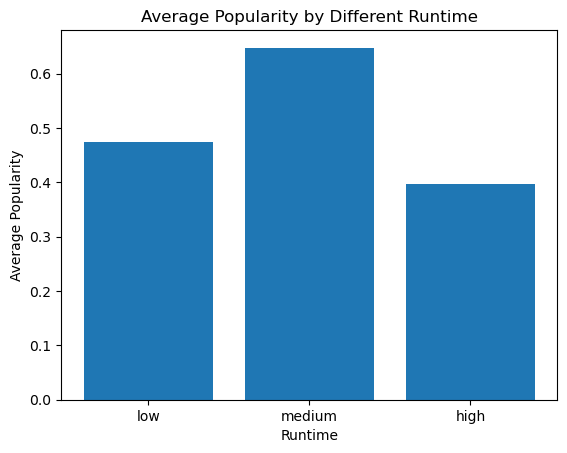

In [69]:
# create a bar chart with the values we get above 

plt.bar([1,2,3], [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long], tick_label = ['low','medium','high'])
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')
plt.show()

The ideal duration of movies should be neither excessively long nor too short. A moderate length is preferable for achieving greater popularity.

Q3 : Higher popularity means higher profits ?

In [76]:
# we need to get the mean of popularity 
m_popularity = movie['popularity'].median()
lower_popularity =  movie.query('popularity < {}'.format(m_popularity))
higher_popularity =  movie.query('popularity >= {}'.format(m_popularity))

In [77]:
# create a new column called profit. profit = Revenue - budget
movie['profit'] = movie['revenue'] - movie['budget']

In [78]:
# average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

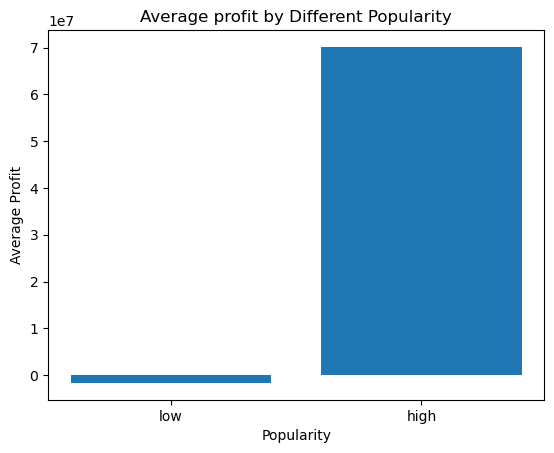

In [79]:
# create a bar chart with the values we get above 

plt.bar([1,2], [mean_profit_of_low_popularity, mean_profit_of_high_popularity], tick_label = ['low','high'])
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit')
plt.show()

Conclusions for Question 3: As we see can above, higher popularity does make much higher average profits.

Q4. Which genres are most popular from year to year?

In [80]:
#The following function can give all the counts for per category 
def extract_data(column_name):
    data = movie[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   # split the genres by |
    # Display value count in descending order
    count = data.value_counts(ascending = False) # count the occurrence of each genres 
    return count

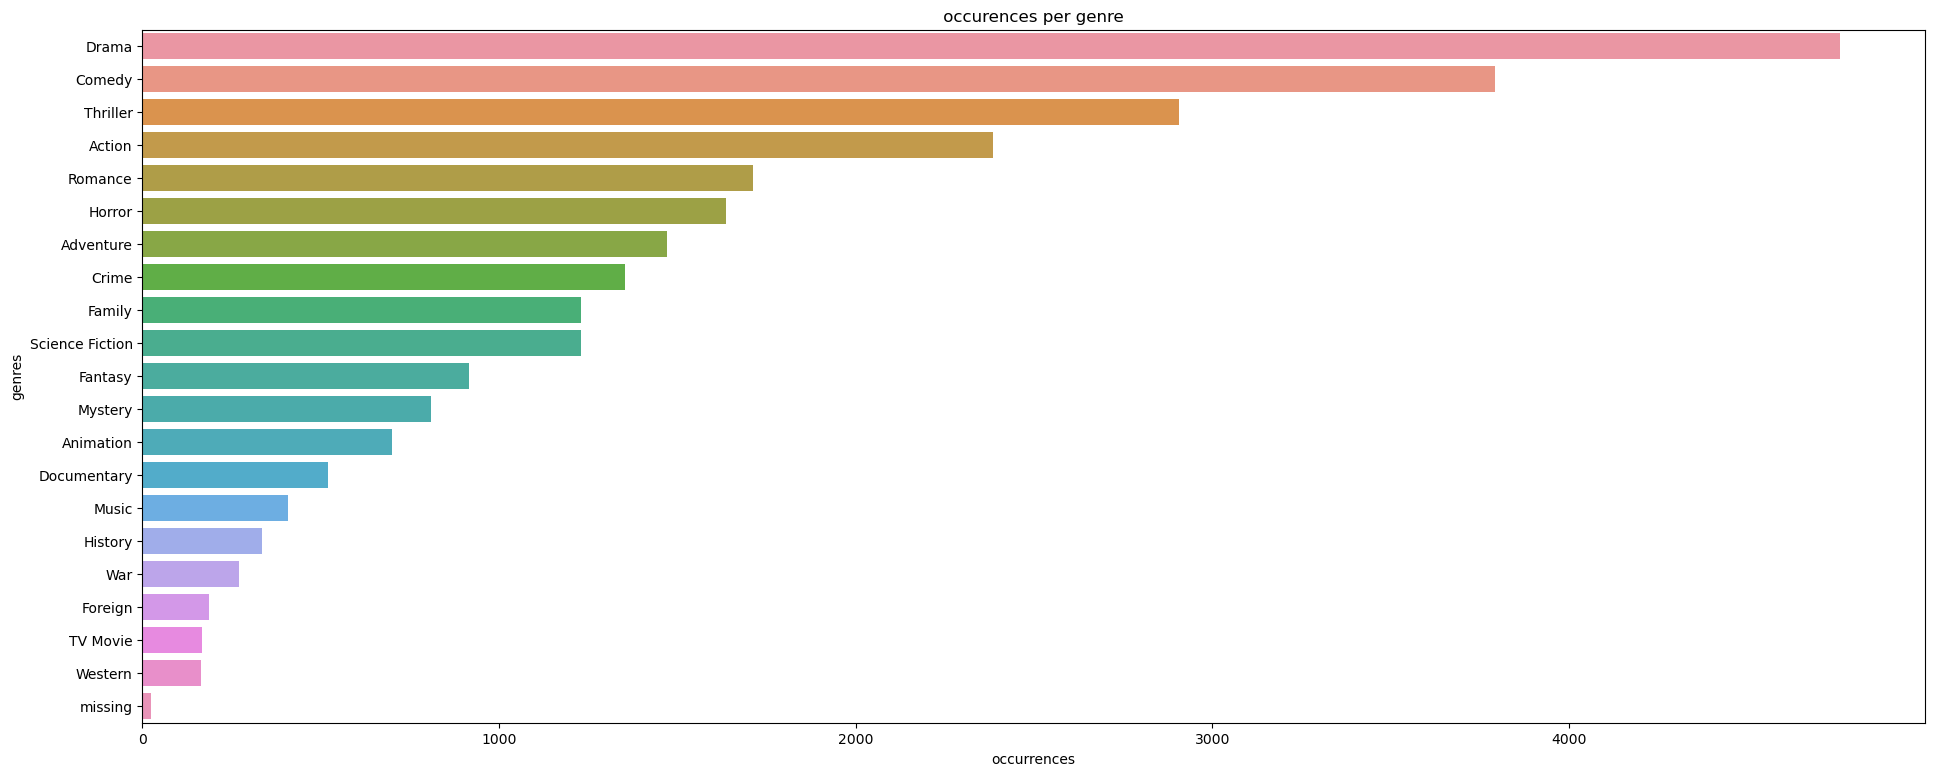

In [81]:
# use the function created above to split genres and count the occurrence of each one
genre_count = extract_data('genres')

#create a separate dataframe to plot
movie_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 

f, ax = plt.subplots(figsize=(23, 9))
# use the dataframe just created as the input data 
sns.barplot(x = 'count', y = 'genres', data=movie_genre_counts) # how to get the data is the key 
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

In [82]:
director_count = extract_data('director')
director_count

Woody Allen         46
missing             44
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
Mike Maguire         1
Tom Kuntz            1
John Simpson         1
Simon Hunter         1
Harold P. Warren     1
Length: 5363, dtype: int64

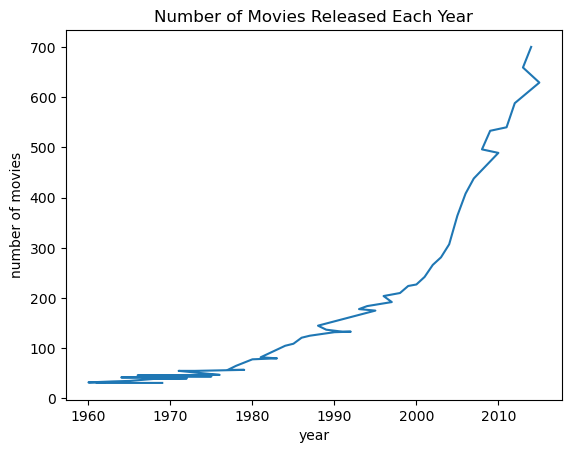

<Figure size 640x480 with 0 Axes>

In [87]:
movie_count = movie['release_year'].value_counts()
movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')
fig = plt.figure()
plt.show()

we can see The top 5 genres are Drama, Comedy, Thriller, Action and Romance. The number of movies increased along the time.

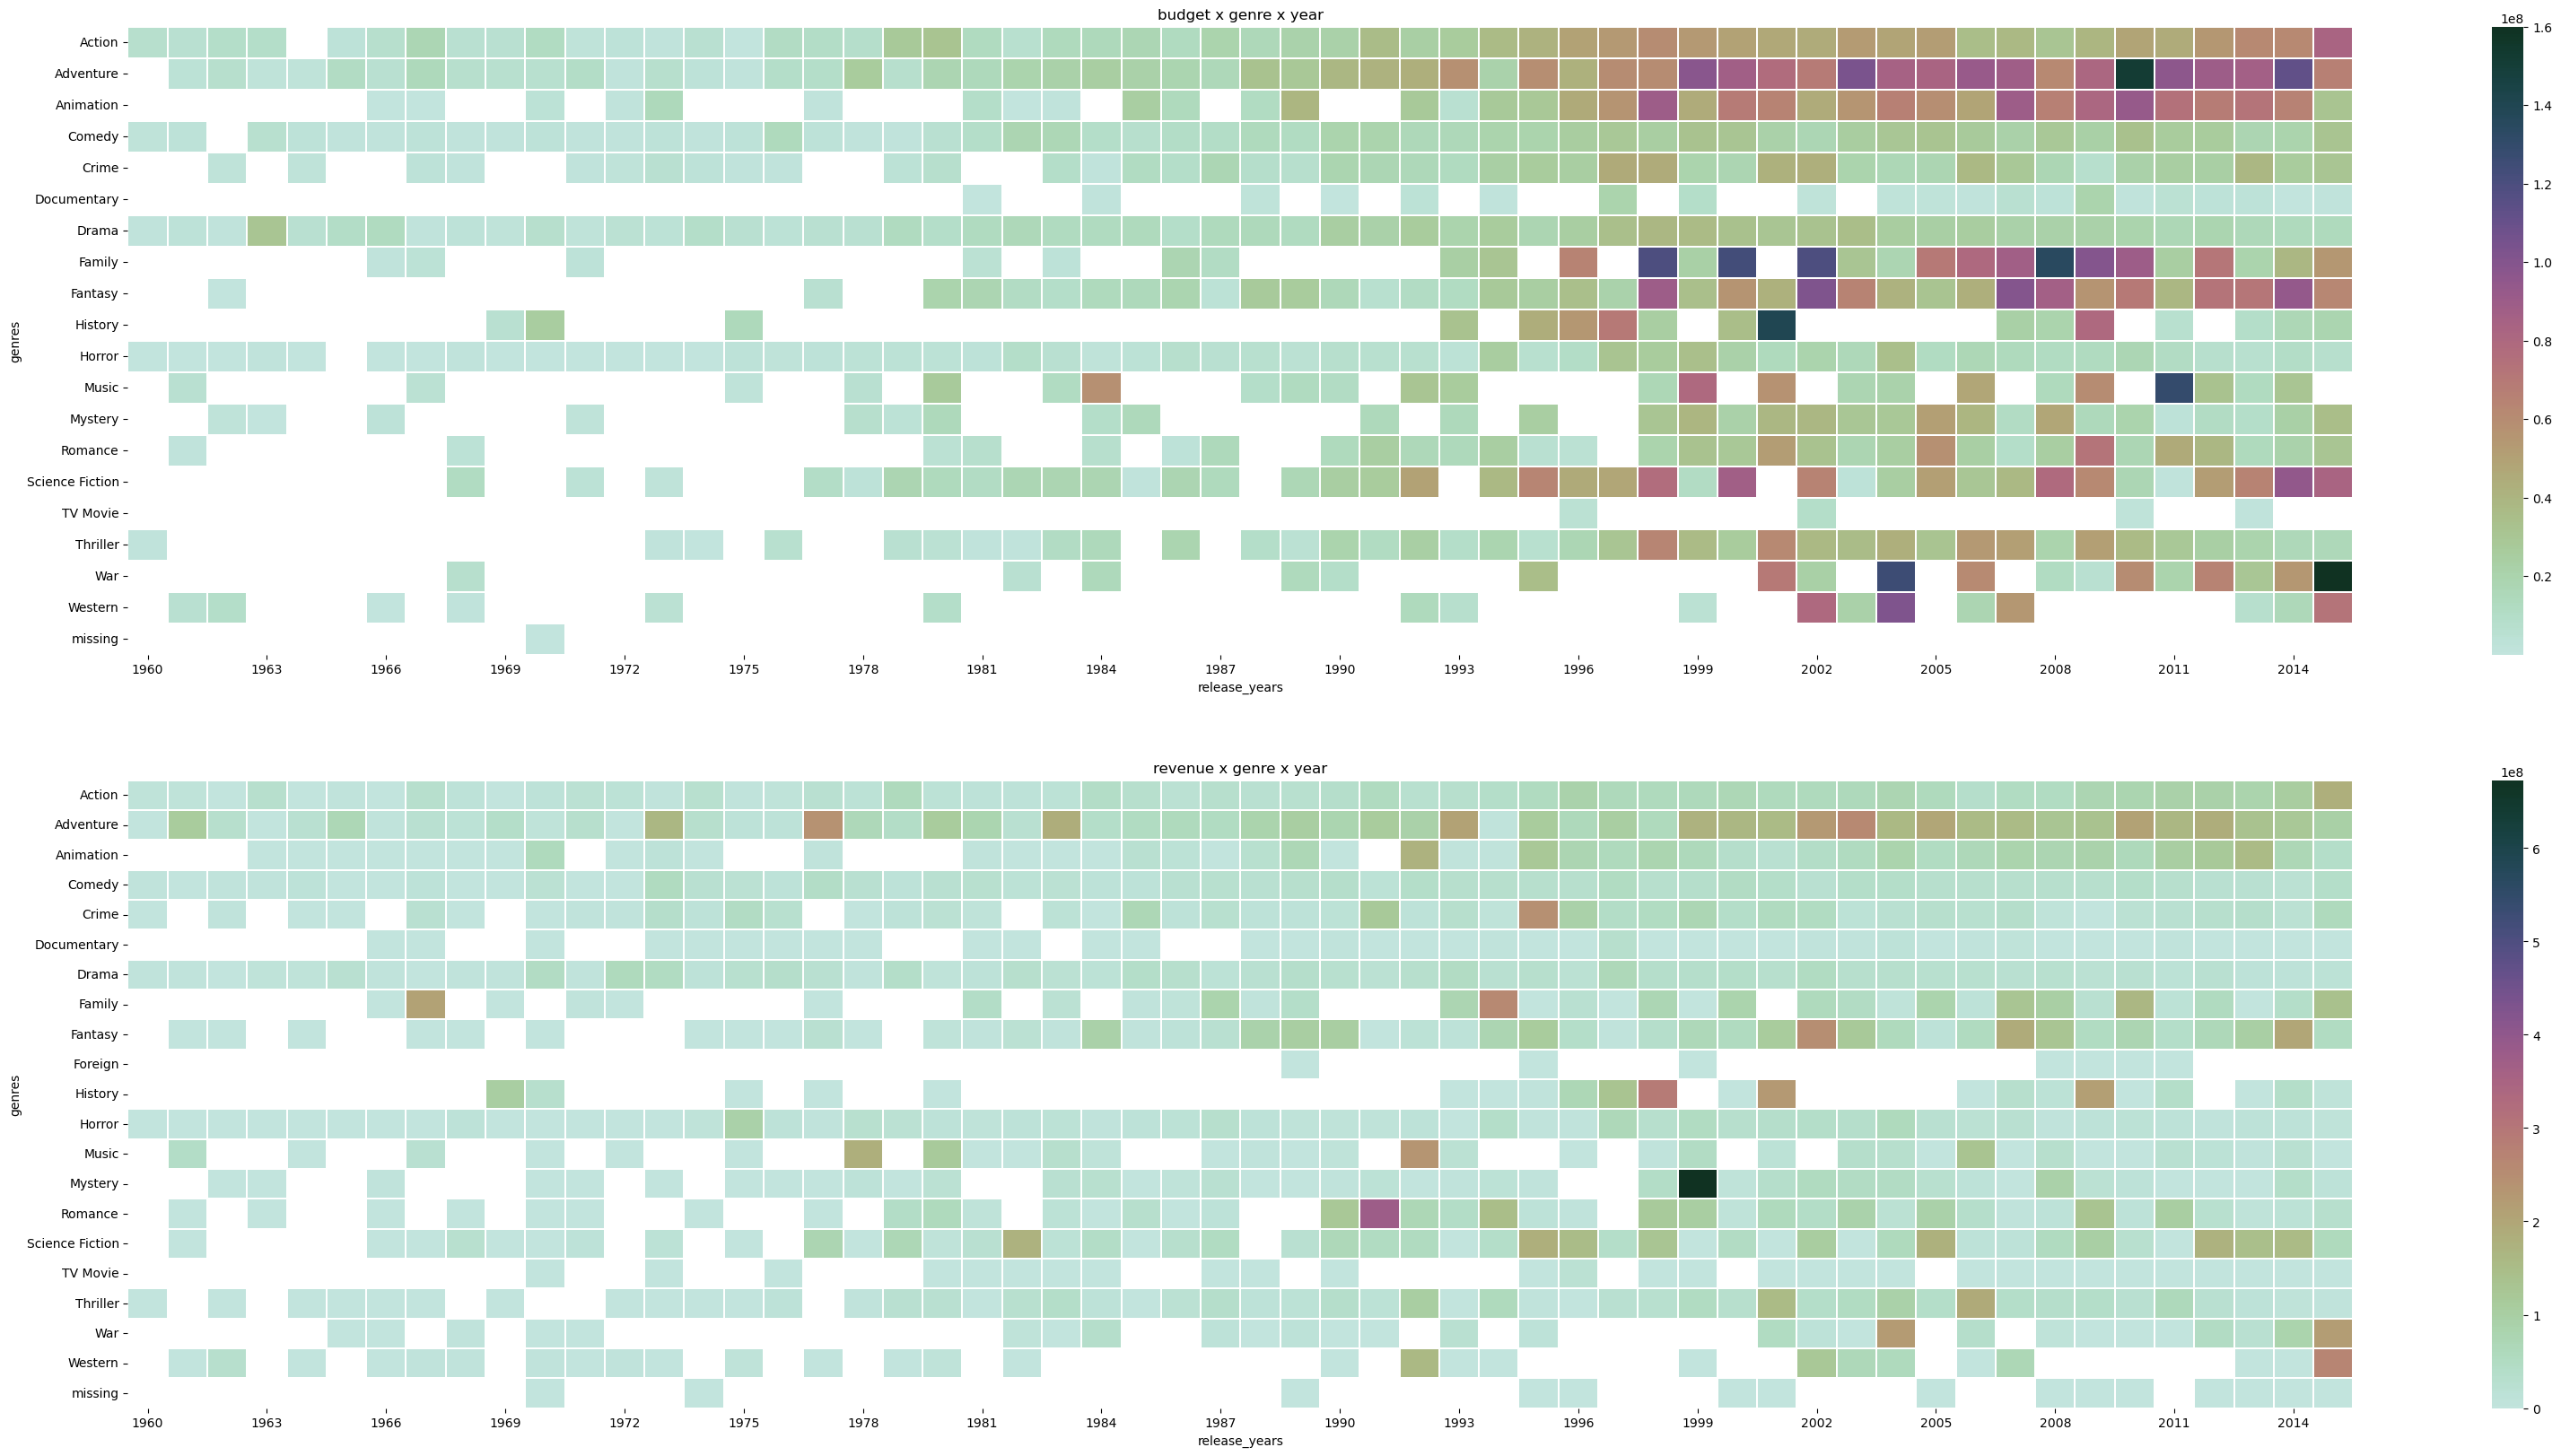

In [88]:
# The following is a really comprehensive plot. It shows the revenue and budget for each genre type per year
# genres are so specific, I will just take the first genre for each movie instead of the genre combination
movie['genre'] =  movie['genres'].apply(lambda x: x.split('|')[0])

# plot all the genre types for each year with the budget and revenue
genre_year = movie.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)


df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap=cmap, linewidths=0.05, ax=axB)
axA.set_title('budget x genre x year')
axA.set_xlabel('release_years')
axA.set_ylabel('genres')


axB.set_title('revenue x genre x year')
axB.set_xlabel('release_years')
axB.set_ylabel('genres')
plt.show()

Conclusion for Question 4: 
In conclusion, over time, the selection of movies and genres available to us has expanded significantly. Between 1984 and 2014, there was a noticeable increase in the number of movies with large budgets and high revenue.

# Conclusion


In conclusion, according to the aforementioned analysis, we can draw the following conclusions:

1. The number and variety of movies have increased, providing audiences with a wider selection.
2. It cannot be definitively stated that a high budget guarantees high popularity. However, movies with larger budgets tend to have higher average popularity.
3. To create a more popular movie, a runtime of approximately 150 minutes is recommended. Genres such as Drama, Comedy, and Thriller are particularly favored.